## Бактерия рисует

В данном проекте мы используем API биослучайных чисел, сгенерированных бактериями, для рисования случайного изображения с помощью Yandex ART.

> Мы предполагаем, что значения `folder_id` и `api_key` для использования Yandex ART содержатся в переменных окружения.

Для начала, опишем модель генерации изображения:

In [2]:
import requests
import os
from yandex_cloud_ml_sdk import YCloudML

sdk = YCloudML(folder_id=os.environ['folder_id'],auth=os.environ['api_key'])
model = sdk.models.image_generation('yandex-art')

Теперь опишем функцию получения биослучайного числа:

In [1]:
base_url = "https://art.ycloud.eazify.net:8443/biorandom"

def get_latest():
    res = requests.get(f"{base_url}/get/latest").json()
    return res

Собственно генерация изображений по биослучайному числу:

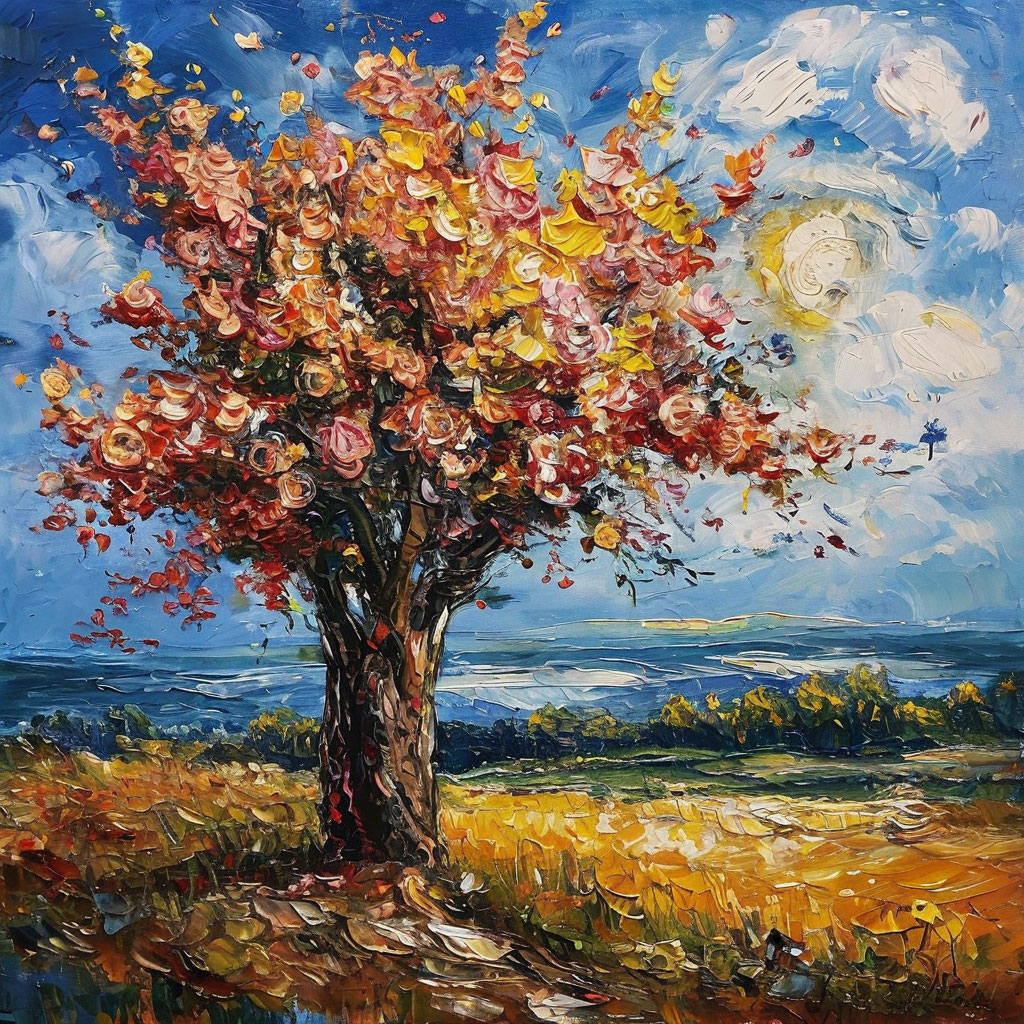

In [4]:
biorandom = get_latest()
operation = model.configure(seed=biorandom['num']).run_deferred('картина маслом')
result = operation.wait()
result

Рисуем несколько био-случайных картин:

In [21]:
import matplotlib.pyplot as plt
from PIL import Image

ns = []
last = None
while len(ns) < 10:
    biorandom = get_latest()
    if biorandom['timestamp']!=last:
        res = model.configure(seed=biorandom['num']).run_deferred('картина маслом')
        last = biorandom['timestamp']
        print(f"Generating for timestamp = {last}")
        ns.append(res.wait())

Generating for timestamp = 2025-04-25 16:35:44
Generating for timestamp = 2025-04-25 16:35:53
Generating for timestamp = 2025-04-25 16:36:01
Generating for timestamp = 2025-04-25 16:36:17
Generating for timestamp = 2025-04-25 16:36:26
Generating for timestamp = 2025-04-25 16:36:33
Generating for timestamp = 2025-04-25 16:36:49
Generating for timestamp = 2025-04-25 16:36:59
Generating for timestamp = 2025-04-25 16:37:07
Generating for timestamp = 2025-04-25 16:37:23


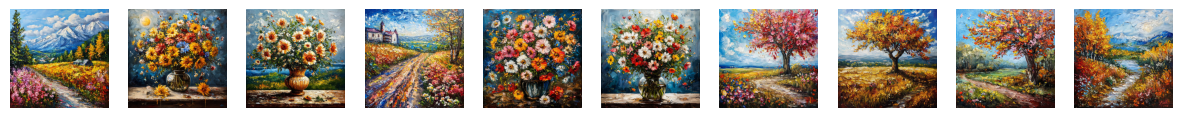

In [27]:
import io 

fig,ax = plt.subplots(1,len(ns),figsize=(15,7))
for i,n in  enumerate(ns):
    ax[i].imshow(Image.open(io.BytesIO(n.image_bytes)))
    ax[i].axis('off')